In this lecture, we study customizations of visualization in Python using the 'seaborn' package. We will focus on studying plot types and plot arrangements using grids.  

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, so this helps you create similar plots separated by features. By using grids, we can combine different type of plots in a matrix of graphical displays. 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We will use the 'iris' dataset for our subsequent example. This dataset is widely used in many statistical learning algorithms.

In [2]:
iris = sns.load_dataset('iris')
iris.info()
iris.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


As our first example, let's first create a pairplot() object to do pairwise plotting for numeric variables. And then we will invoke the PairGrid() method as a comparison, which is a subplot grid for plotting pairwise relationships in a dataset.

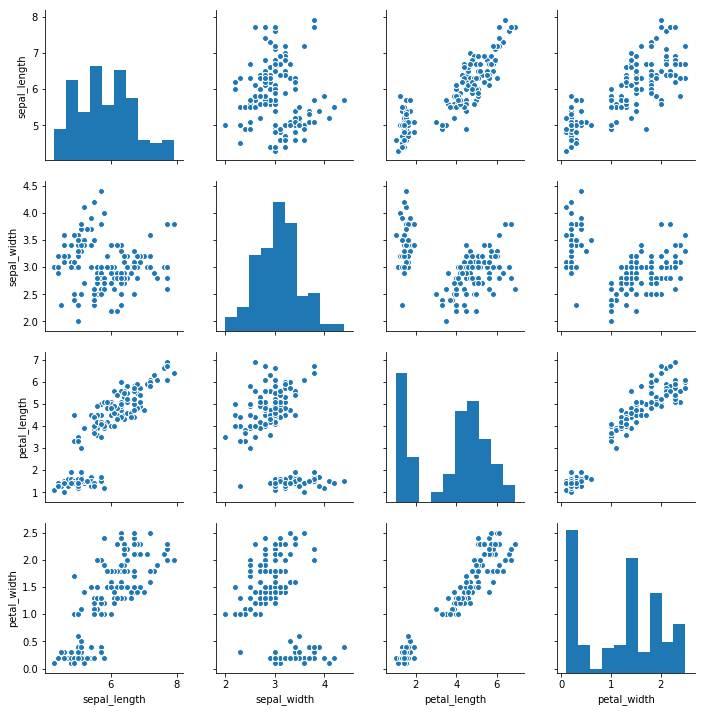

In [4]:
sns.pairplot(iris)

To use PairGrid(), the first step is to create a grid of empty plots for subsequent setups:

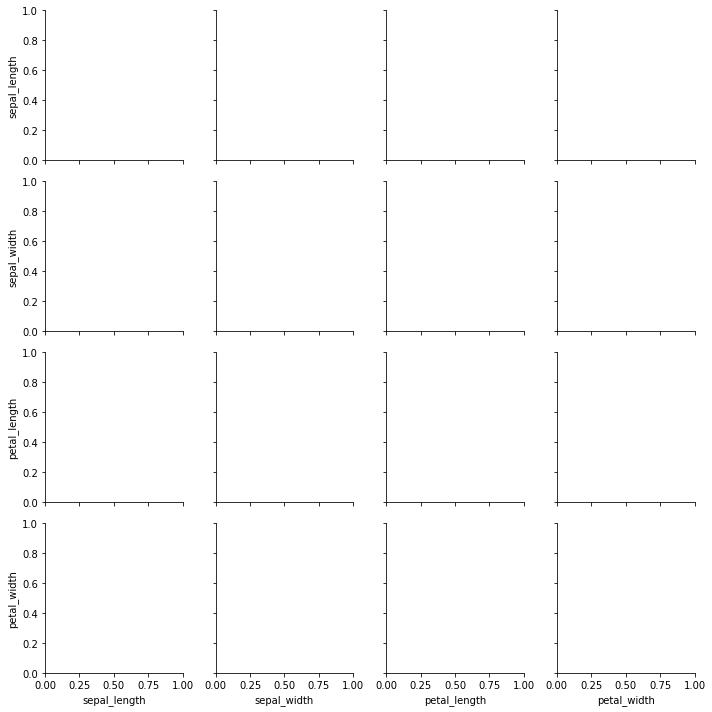

In [5]:
sns.PairGrid(iris) # creating a grid of empty plots

We have used pairplot() to generate a matrix of graphs for numeric variables. The PairGrid() method currently gives a matrix of empty pictures. As you see, on the diagonal of the result from pairplot(), every picture is a a histogram whilst the non-diagonal elements are all scatterplots. Suppose now this is not what we want. Instead, we want every picture to be a scatterplot. Then we need to invoke the PairGrid() method to achieve the goal. The idea is to create an object from PairGrid() and then 'map' a special plot to that object. Below is the code for this example, which ensures every element in the matrix of pictures is a scatterplot:

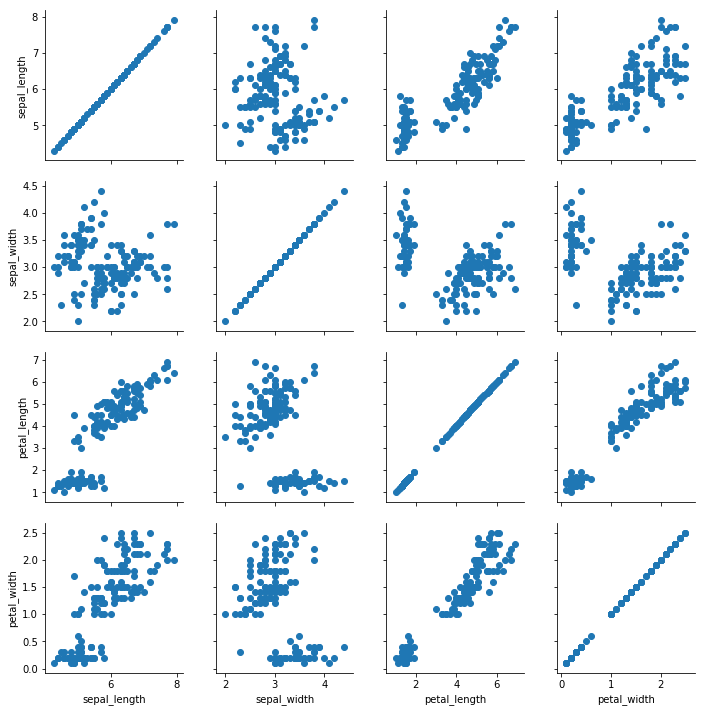

In [6]:
g = sns.PairGrid(iris)
g.map(plt.scatter) # mapping scatter plots 

Now suppose we want every graph on the diagonal to be a histogram and every graph on the upper triangle of the matrix to be a scatterplot. Then we will need methods such as map_diag() and map_upper() to help us. Since map_lower() in this case is not specified, the graphs on the lower triangle remains vacant:

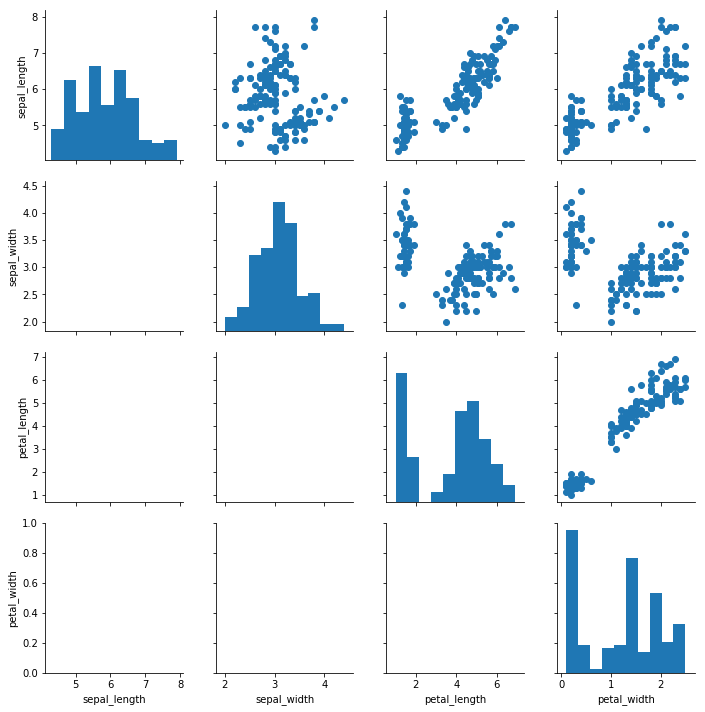

In [7]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)

Next we talk about facet grids, which is the general way to create grids of plots based off of a feature. To be more precise, FacetGrid() is more flexible in the sense that it requires the row and column argument to be specified precisely. The idea is very similar to PairGrid(): we first create a PairGrid() empty matrix of graphics and then do the mapping in a similar fashion. 

We will use the built-in 'tips' dataset for our example. Let's go over this step by step. We first load the data and then create an empty matrix of graphs:

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


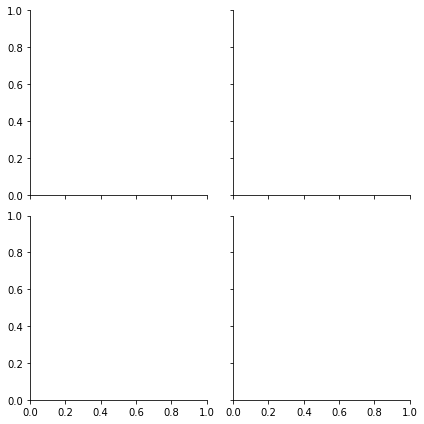

In [9]:
g = sns.FacetGrid(tips, col="time", row="smoker")

Now, suppose we want to do a by-group analysis on the variable 'total_bill', but we want to analyze it by the types of 'smokers' and the types of 'time'. In this dataset, both 'smokers' and 'time' have two categories ('Yes' vs. 'No' and 'Lunch' vs. 'Dinner'). In this case, we expect a 2-by-2 matrix of graphs like below. The 'col' argument must be the one that is categorical in nature, so is the 'row' argument:

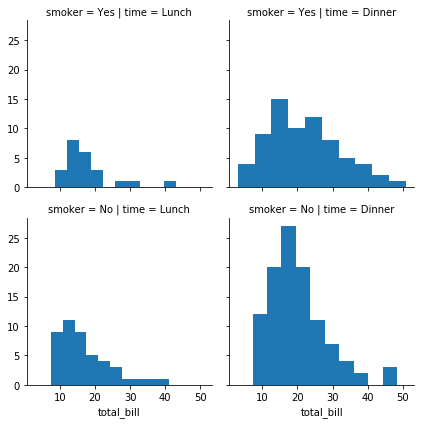

In [14]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

We can of course add some enhancements:

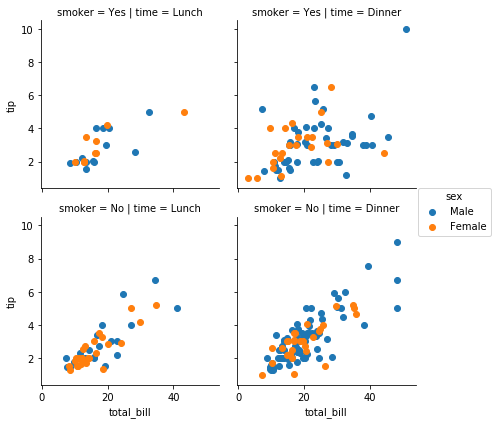

In [15]:
g1 = sns.FacetGrid(tips, col="time",  row="smoker", hue='sex')
g2 = g1.map(plt.scatter, "total_bill", "tip").add_legend()

As the last item to be discussed, JointGrid() is the general version for joint plots types of grids. Here is a quick example below. As you see, the JointGrid() essentially combines two displot() in one place:

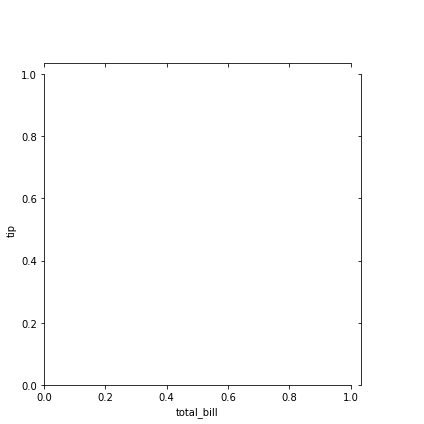

In [16]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

C:\Users\pgao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


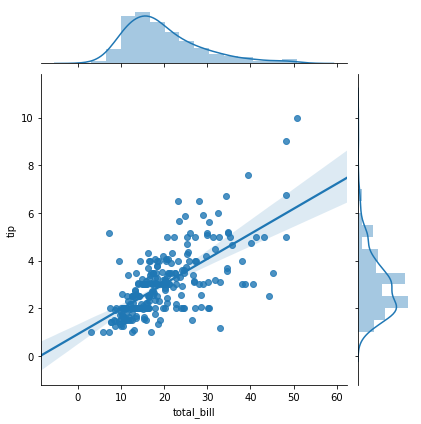

In [17]:
g3 = sns.JointGrid(x="total_bill", y="tip", data=tips)
g4 = g3.plot(sns.regplot, sns.distplot)